# Classification models 
CDS Class, prepared by Prof. Dorien Herremans

You can run this lab in Playground mode and add your own code at the #todo items and final questions. 


---






Let's start by loading the necessary libraries for this class. The main libraries used are numpy and pandas for data handling and [scikit learn (sklearn)](https://scikit-learn.org/stable/) for classification models. 


In [1]:
import matplotlib.pyplot as plt # plotting library
import numpy as np # library for numerical calculations
import pandas as pd # library for reading csv files

## Walkthrough example of different classification methods

To become familiar with the classification models, please follow the instructions below. 

### Problem description and preparing dataset

Let's start doing some classification on the Heart Disease dataset from Kaggle at https://www.kaggle.com/ronitf/heart-disease-uci. The dataset has 303 patients and 13 features for each patient. 

You can find the dataset at the link above, or directly load it like shown below: 


In [2]:
# Download the csv file to your root folder: 
!wget -P / -c 'https://dorienherremans.com/drop/CDS/classification/heart.csv'

data = pd.read_csv('heart.csv') # loading dataset

data.head() #check if it's loaded correctly

--2021-10-15 04:35:23--  https://dorienherremans.com/drop/CDS/classification/heart.csv
Resolving dorienherremans.com (dorienherremans.com)... 99.198.97.250
Connecting to dorienherremans.com (dorienherremans.com)|99.198.97.250|:443... connected.
HTTP request sent, awaiting response... 416 Requested range not satisfiable

    The file is already fully retrieved; nothing to do.



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Let's make the data nicer. Since the column headers are a bit heard to read, we can override them to provide more easy to understand labels:

In [3]:
# Give a better name to each column
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 
                'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 
       'thalassemia', 'target']

Let's check how balanced our dataset is. 

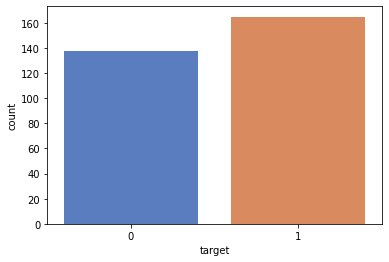

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
#breakdown by class
sns.countplot(x="target", data=data, palette="muted");

It's almost balanced, but not entirely, so during evaluation, let's make sure to check F1 values and AUC instead of just accuracy. 

We also need to make sure that the system recognises our data as being categorical appropriately. 

In [5]:
data.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
target                       int64
dtype: object

This looks good. Everything is an integer, except for the continuous variables. In the case where categories are stored as strings, you need to correct this with: 

data['Class'] = pd.Categorical(data['Class'])

data['Class'] = data['Class'].cat.codes

In our case all is well. 

Looking at the header, the prediction task is now clear: we need to predict if target = 1, meaning heart disease is present. 

To properly evaluate models, we **create a test and training set** with 30% split using train_test_split. 

In [6]:
from sklearn.model_selection import train_test_split
# data = pd.get_dummies(data, drop_first=True)
# We split the data up into a test set and a training set, 30 - 70 %
# train_test_split
# First argument: x data is all data without class column
# Second argument:  this is the class label column
# Random state = 0: ensures the train and test splitting is deterministic. 
#Otherwise every student would get a different train test split.
X_train, X_test, y_train, y_test = train_test_split(data.drop('target',1), 
                                                    data['target'],
                                                    test_size=0.3,
                                                    random_state=0) 

Most classifiers will work best if the data is normalized. We can easily do this by using the MinMaxScaler fuction. 

TODO: fit the X_train data normalization factors into the x_scaler using `fit(X_train)`


In [7]:
from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

### Model 1: Decision Trees

Let's import the sklearn library for CART decision trees, and define a variable 'model' to hold our CART tree model. We can specify some pruning/early stopping parameters so that the size of the tree can be adjusted. 

In [9]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=1) 
# Using default parameters

Let's train the model by passing it our training data X_train and labels y_train. Note that decision trees don't need normalized data, in this case it may be easier to understand with the original data (so we are using X_train, not X_train_norm as we do in the other models). 

you can use the fit command to train the model: `model.fit(xvariables, yvariables)` (change the variables to the correct training data)

In [10]:
model.fit(X_train_norm,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Notice how the options above let you tweek the classifier (e.g. criterion Gini coefficient). This model trained really fast! But how good is it?

I've emphasized the importance of evaluating models using multiple metrics in class. Let's **define a function called
evaluate_on_training_set, which will print out all of out metrics**. This will save us some time throughout the lab. 


TODO: print the auc score `using (replace variables): roc_auc_score(realvalue, predicted value)`


In [11]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

def evaluate_on_training_set(y_test, y_pred):
  # Calculate AUC
  print("AUC is: ", roc_auc_score(y_test,y_pred))
  
  # print out recall and precision
  print(classification_report(y_test, y_pred))
  
  # print out confusion matrix
  print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

  # # calculate points for ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  
  # Plot ROC curve
  plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc_score(y_test, y_pred))
  plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate or (1 - Specifity)')
  plt.ylabel('True Positive Rate or (Sensitivity)')
  plt.title('Receiver Operating Characteristic')

Using this new function we can now make predictions for our newly trained model 'model' and get the evaluation metrics: 


[0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0]
AUC is:  0.7098646034816246
              precision    recall  f1-score   support

           0       0.63      0.91      0.75        44
           1       0.86      0.51      0.64        47

    accuracy                           0.70        91
   macro avg       0.75      0.71      0.69        91
weighted avg       0.75      0.70      0.69        91

Confusion Matrix: 
 [[40  4]
 [23 24]]


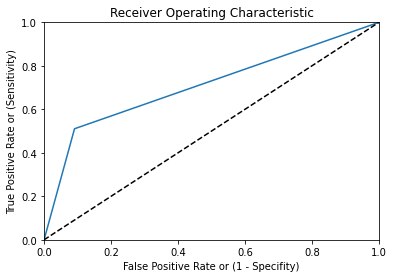

In [12]:
y_pred = model.predict(X_test) # Predicting labels for our test set using model
print (y_pred)
evaluate_on_training_set(y_test, y_pred) #evaluate our model using new function

Finally, what does the actual tree look like? You can experiment yourself how the tree (and the accuracy) changes when we set different pruning parameters. 

[Text(390.6, 570.7800000000001, 'X[2] <= 0.167\ngini = 0.494\nsamples = 212\nvalue = [94, 118]'),
 Text(195.3, 407.70000000000005, 'X[11] <= 0.125\ngini = 0.415\nsamples = 102\nvalue = [72, 30]'),
 Text(97.65, 244.62, 'X[12] <= 0.833\ngini = 0.492\nsamples = 48\nvalue = [21, 27]'),
 Text(48.825, 81.53999999999996, 'gini = 0.328\nsamples = 29\nvalue = [6, 23]'),
 Text(146.47500000000002, 81.53999999999996, 'gini = 0.332\nsamples = 19\nvalue = [15, 4]'),
 Text(292.95000000000005, 244.62, 'X[0] <= 0.734\ngini = 0.105\nsamples = 54\nvalue = [51, 3]'),
 Text(244.125, 81.53999999999996, 'gini = 0.0\nsamples = 43\nvalue = [43, 0]'),
 Text(341.77500000000003, 81.53999999999996, 'gini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(585.9000000000001, 407.70000000000005, 'X[9] <= 0.315\ngini = 0.32\nsamples = 110\nvalue = [22, 88]'),
 Text(488.25, 244.62, 'X[7] <= 0.566\ngini = 0.255\nsamples = 100\nvalue = [15, 85]'),
 Text(439.425, 81.53999999999996, 'gini = 0.438\nsamples = 34\nvalue = [11, 23

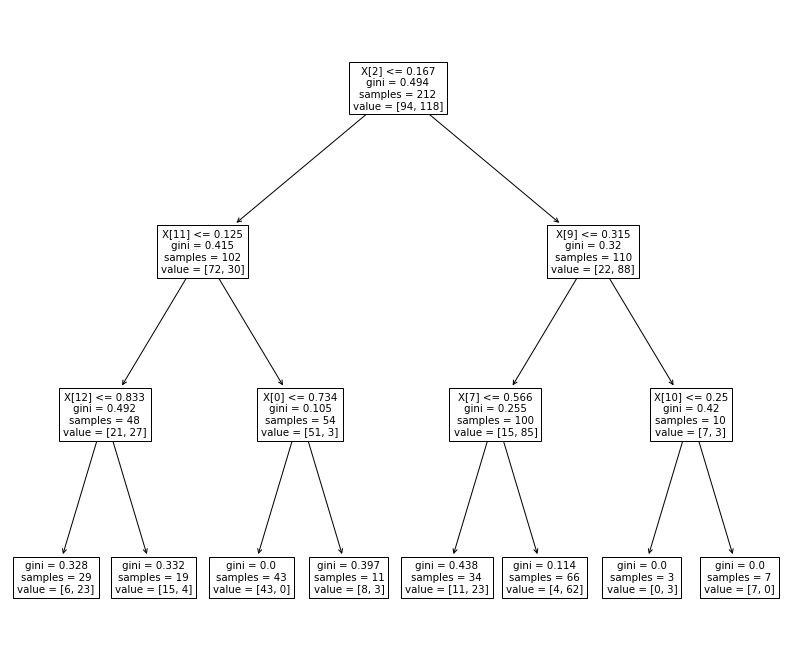

In [13]:
plt.figure(figsize=(14,12))
tree.plot_tree(model)

### Model 2: K Nearest Neighbor Classifier

Let's explore the kNN algorithm. As you've seen in class. It's a very simple algorithm, however, it needs a lot of time to compute all distances. 

Similar to before, we first load the library and define the model with parameters (here only the parameter k is needed). 

In [14]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=20) # Define the model with parameters

We can then proceed to train the model using the fit command and evaluate it using the function we defined before: 

AUC is:  0.7202611218568665
              precision    recall  f1-score   support

           0       0.81      0.57      0.67        44
           1       0.68      0.87      0.77        47

    accuracy                           0.73        91
   macro avg       0.74      0.72      0.72        91
weighted avg       0.74      0.73      0.72        91

Confusion Matrix: 
 [[25 19]
 [ 6 41]]


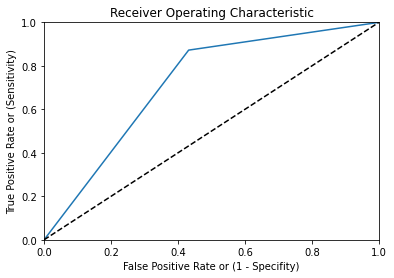

In [15]:
model.fit(X_train_norm, y_train) # Training the model

# Evaluate the model: 
y_pred = model.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

It's extremely important to set a good value for k, so you will need to test this. E.g. try running the above code with k = 5. See any change? Your F1 scores should go up! 

### Model 3: Logistic Regression

Let's move on to a very powerful, yet fast model: Logistic Regression. Again, we start by loading the library and defining the model together with its parameters. 

In this case, multi_class auto will detect the number of classes automatically, C is our regularisation parameter, and solver is the optimization algorithm used to fit the model: 
* For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
* For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
* ‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty
* ‘liblinear’ and ‘saga’ also handle L1 penalty
* ‘saga’ also supports ‘elasticnet’ penalty
* ‘liblinear’ does not handle no penalty

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1.0, multi_class='auto', solver='lbfgs') 
# Define the model with parameters

We can the train and evaluate the model like usual: 

AUC is:  0.7884429400386848
              precision    recall  f1-score   support

           0       0.84      0.70      0.77        44
           1       0.76      0.87      0.81        47

    accuracy                           0.79        91
   macro avg       0.80      0.79      0.79        91
weighted avg       0.80      0.79      0.79        91

Confusion Matrix: 
 [[31 13]
 [ 6 41]]


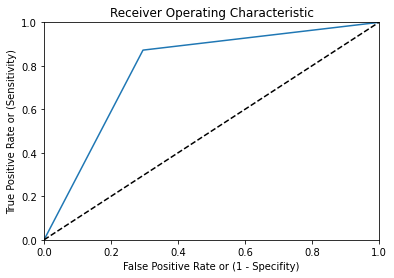

In [17]:
model.fit(X_train_norm, y_train) # Training the model

y_pred = model.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function


This is a fast model again, with rather good output. 

### Model 4: Gaussian Naive Bayes

Let's create a Naive Bayes model. There are a [number of variants on this model to choose](https://scikit-learn.org/stable/modules/naive_bayes.html) from in Scikit learn, let's pick the Gaussian variant. Same thing as always, we load the library and define the model: 

In [18]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB() # Define the model with parameters

We can proceed to train (fit) the model and evaluate: 

AUC is:  0.799806576402321
              precision    recall  f1-score   support

           0       0.84      0.73      0.78        44
           1       0.77      0.87      0.82        47

    accuracy                           0.80        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91

Confusion Matrix: 
 [[32 12]
 [ 6 41]]


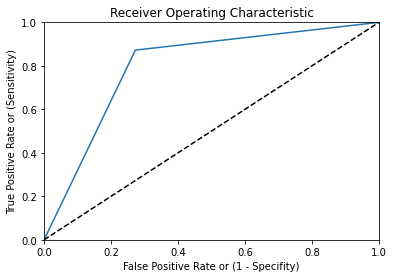

In [19]:
model.fit(X_train_norm, y_train) # Training the model

y_pred = model.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

Not a bad result! Gaussian models often perform well with smaller datasets as they fit the limited data to a distribution. 

### Model 5: SVM

Support Vector Machines offer a very powerful way to transform our data by implementing a 'kernel trick'. Hence, when we define our model, we need to specify our kernel. The results will be highly dependant on the kernel value and the regularisation parameter C. 

The kernel can be: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’. If none is given, ‘rbf’ will be used.

In [20]:
from sklearn.svm import SVC
model = SVC(C=10, gamma='auto', kernel='rbf')
model.fit(X_train_norm, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

As usual, we use the exact same commands to train and evaluate the model: 

AUC is:  0.7983558994197292
              precision    recall  f1-score   support

           0       0.88      0.68      0.77        44
           1       0.75      0.91      0.83        47

    accuracy                           0.80        91
   macro avg       0.82      0.80      0.80        91
weighted avg       0.82      0.80      0.80        91

Confusion Matrix: 
 [[30 14]
 [ 4 43]]


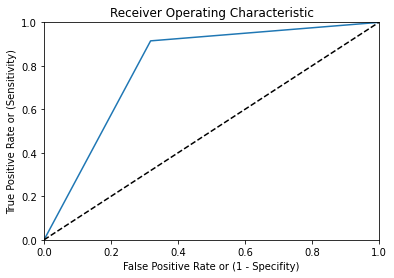

In [21]:
model.fit(X_train_norm, y_train) # Training SVM

y_pred = model.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

##### optimizing SVM using GridSearch 
Were you expecting better results from such a powerful model? Let's tweek the parameters to improve our accuracy...

We will be using Grid Search to tune parameters and try a range: 
- with kernel rbf, try varying gamma (which is a coefficient in the rbf kernel) to be 1e-3 or 1e-4; and vary C to be 1, 10, or 100.
- with linear kernel (there is no gamma here), try varying C to be 1, 10, and 100.

These values are stored as tuned_parameters. 

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

tuned_parameters = [{'kernel': ['rbf'], 
                     'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100]},
                    {'kernel': ['linear'],
                     'C': [1, 10, 100]}]

Using the above parameters, we can run a GridSearch algorithm to optimize the AUC score. The verbose output will output the process; n_jobs will parallize the computation over 4 processors; 2-fold CV is used during the search (cv = 2). 

In [23]:
# we define the grid search model for SVM: 
clf = GridSearchCV(SVC(), tuned_parameters, cv=2,
                   scoring='roc_auc', verbose=1, n_jobs=4)

# train the model on the training set: 
clf.fit(X_train_norm, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed:    2.7s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=4,
             param_grid=[{'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

Once this is trained we can again look at what the best parameters are and how well the model performs. 

Best parameter set found on development set:
{'C': 10, 'kernel': 'linear'} 

AUC is:  0.8210831721470019
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        44
           1       0.78      0.91      0.84        47

    accuracy                           0.82        91
   macro avg       0.84      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

Confusion Matrix: 
 [[32 12]
 [ 4 43]]


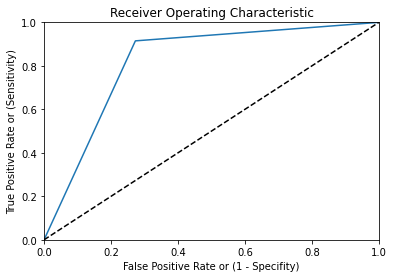

In [24]:
# Show best parameters: 
print("Best parameter set found on development set:")
print(clf.best_params_, '\n')

y_pred = clf.predict(X_test_norm) #create predictions
evaluate_on_training_set(y_test, y_pred) # evaluate like we always do

### Model 5: AdaBoostClassifier (Ensemble method)

Ensemble models such as AdaBoost build multiple models and leverage the output to get a better result (most of the time). Sklearn tells us that: "AdaBoost is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases."

Let's define our model and set some parameters, learning rate can vary from 0 to 1; and n_estimators is the number of times a model is built. 

In [25]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1) # Define the model with parameters

How does it perform? 

AUC is:  0.8239845261121856
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        44
           1       0.83      0.83      0.83        47

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91

Confusion Matrix: 
 [[36  8]
 [ 8 39]]


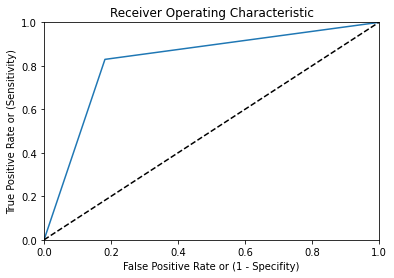

In [26]:
model.fit(X_train_norm, y_train) # Training the model

y_pred = model.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

### Model 6: RandomForestClassifier

Another ensemble classifier is Random Forest, which takes a bagging approach. We define the model: 

In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 50) # Define the model

You can experiment with the parameters above (n_estimators is how many trees there are in the model), until you get good results. More parameters about the trees can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). 

TODO: fit and get results like before

AUC is:  0.8438104448742746
              precision    recall  f1-score   support

           0       0.89      0.77      0.83        44
           1       0.81      0.91      0.86        47

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91

Confusion Matrix: 
 [[34 10]
 [ 4 43]]


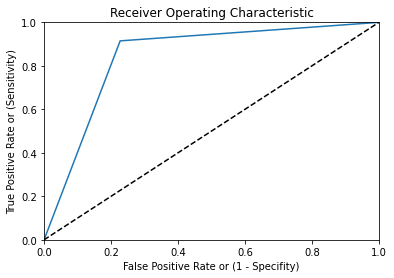

In [28]:
model.fit(X_train_norm, y_train) # Training the model

y_pred = model.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

This is an excellent model and trained quite fast. 

# Exercise: predicting academic performance

Find the best performing model to predict student's academic performance and the following dataset: https://www.kaggle.com/aljarah/xAPI-Edu-Data. The goal is to estimate the grade level of the student: 

The students are grouped into three numerical intervals based on their total grade/mark:
* Low-Level: interval includes values from 0 to 69,
* Middle-Level: interval includes values from 70 to 89,
* High-Level: interval includes values from 90-100.

Some steps for you to follow: 

1. Load the csv file as dataframe directly from 

https://dorienherremans.com/drop/CDS/classification/xAPI-Edu-Data.csv
2. Check if columns are recognised as categorical, is not, change them to categorical with the command: 

```
for key in ['gender','NationalITy','PlaceofBirth','StageID','GradeID','SectionID','Topic','Semester','Relation',
'ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays','Class']:

    data[key] = pd.Categorical(data[key])
    data[key] = data[key].cat.codes
```

3. Visualise your data in a few useful graphs (up to you to think about what would be useful)
4. Preprocess the data to create a normalized training set with 30% split.
5. Train and evaluate multiple models (decision tree, svm with grid search, logistic regression, embedded models) to find the best classifier. 
6. Show the confusion matrix for the two best models 

IMPORTANT: Evaluate **only** in terms of classification_report and confusion matrix. (No need for AUC and ROC here, as we are doing multiclass classification, the target label would need to be binarized first, which we are not doing.)

We are trying to reach the **best f1 performance**. 

**Fill in your best performing f1 score for class 0 in our high score list: 
https://forms.gle/wquRxxjVBfgnVtht8**


## Data Loading

In [70]:
# your solution
# Download the csv file to your root folder: 
!wget -P / -c 'https://dorienherremans.com/drop/CDS/classification/xAPI-Edu-Data.csv'

data = pd.read_csv('xAPI-Edu-Data.csv') # loading dataset

data.head() #check if it's loaded correctly

--2021-10-15 07:26:13--  https://dorienherremans.com/drop/CDS/classification/xAPI-Edu-Data.csv
Resolving dorienherremans.com (dorienherremans.com)... 99.198.97.250
Connecting to dorienherremans.com (dorienherremans.com)|99.198.97.250|:443... connected.
HTTP request sent, awaiting response... 416 Requested range not satisfiable

    The file is already fully retrieved; nothing to do.



,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [74]:
# Give better names to each column
data.columns = ['Gender','Nationality','PlaceOfBirth','StageID','GradeID','SectionID','Topic','Semester','Relation', 'RaisedHands',
'VisitedResources', 'AnnouncementsView', 'Discussion','ParentAnsweringSurvey','ParentSchoolSatisfaction','StudentAbsenceDays','Class']

## Data Visualization

Text(0.5, 0.98, 'Class distribution')

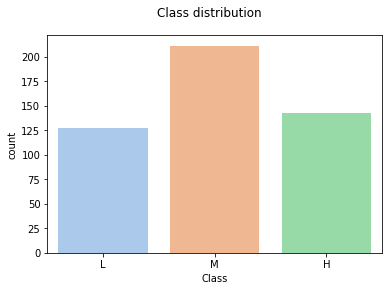

In [111]:
# Class distribution
sns.countplot(x="Class", data=data,palette = 'pastel', order = ['L', 'M', 'H'])
plt.suptitle('Class distribution')
# plt.show()

Class  Gender
H      F          75
       M          67
L      F          24
       M         103
M      F          76
       M         135
Name: Gender, dtype: int64


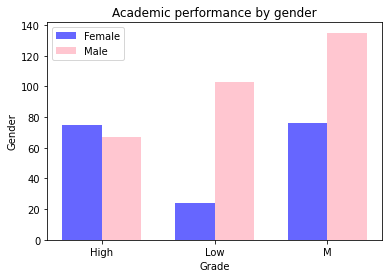

In [109]:
## Comparing performance based on gender
fig, ax = plt.subplots()
index = np.arange(3)
bar_width = 0.35
opacity = 0.6

d=data.groupby(['Class','Gender'])['Gender'].count()
print(d)

f = (d[0],d[2], d[4])
m = (d[1], d[3], d[5])
rects1 = plt.bar(index, f, bar_width,
alpha=opacity,
color='b',
label='Female')

rects2 = plt.bar(index + bar_width, m, bar_width,
alpha=opacity + 0.3,
color='pink', 
label='Male')

plt.xlabel('Grade')
plt.ylabel('Gender')
plt.title('Academic performance by gender')
plt.xticks(index + bar_width/2, ('High', 'Low','M'))
plt.legend()

plt.show()

Class  StudentAbsenceDays
H      Above-7                 4
       Under-7               138
L      Above-7               116
       Under-7                11
M      Above-7                71
       Under-7               140
Name: StudentAbsenceDays, dtype: int64


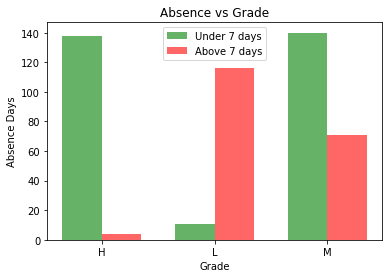

In [102]:
## Relation between grade and number of days absent
fig, ax = plt.subplots()
index = np.arange(3)
bar_width = 0.35
opacity = 0.6

d=data.groupby(['Class', 'StudentAbsenceDays'])['StudentAbsenceDays'].count()
print(d)
# print(d[2])

above_7 = (d[0],d[2], d[4])
under_7 = (d[1], d[3], d[5])
rects1 = plt.bar(index, under_7, bar_width,
alpha=opacity,
color='g',
label='Under 7 days')

rects2 = plt.bar(index + bar_width, above_7, bar_width,
alpha=opacity,
color='r',
label='Above 7 days')

plt.xlabel('Grade')
plt.ylabel('Absence Days')
plt.title('Absence vs Academic Performance')
plt.xticks(index + bar_width/2, ('H', 'L', 'M'))
plt.legend()

plt.show()

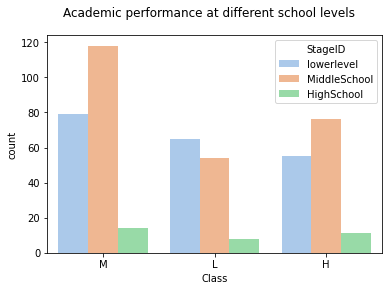

In [43]:
# Performance in different levels
sns.countplot(x= 'Class', data=data, hue='StageID', palette='pastel')
plt.suptitle('Academic performance at different school levels')
plt.show()

## Pre-processing

In [75]:
for key in ['Gender','Nationality','PlaceOfBirth','StageID','GradeID','SectionID','Topic','Semester','Relation', 'RaisedHands',
'VisitedResources', 'AnnouncementsView', 'Discussion','ParentAnsweringSurvey','ParentSchoolSatisfaction','StudentAbsenceDays','Class']:

    data[key] = pd.Categorical(data[key])
    data[key] = data[key].cat.codes

In [76]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Class',1), 
                                                    data['Class'],
                                                    test_size=0.3,
                                                    random_state=0) 

In [77]:
# Normalization
# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

In [78]:
from sklearn.metrics import classification_report, confusion_matrix

def eval(y_test,y_pred):
    # print out recall and precision
    print(classification_report(y_test, y_pred))
  
    # print out confusion matrix
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

## Models

In [79]:
from sklearn.tree import DecisionTreeClassifier
print('Decision Tree')
dtc = DecisionTreeClassifier() 
dtc.fit(X_train_norm, y_train)
y_pred_dtc = dtc.predict(X_test_norm)
eval(y_test, y_pred_dtc)

Decision Tree
              precision    recall  f1-score   support

           0       0.68      0.72      0.70        39
           1       0.81      0.76      0.79        34
           2       0.73      0.73      0.73        71

    accuracy                           0.74       144
   macro avg       0.74      0.74      0.74       144
weighted avg       0.74      0.74      0.74       144

Confusion Matrix: 
 [[28  0 11]
 [ 0 26  8]
 [13  6 52]]


In [83]:
from sklearn.neighbors import KNeighborsClassifier
print('K-nearest Neighbors')
knn = KNeighborsClassifier(n_neighbors = 10) # Define the model with parameters
knn.fit(X_train_norm, y_train)
y_pred_knn = knn.predict(X_test_norm)
eval(y_test, y_pred_knn)

K-nearest Neighbors
              precision    recall  f1-score   support

           0       0.70      0.82      0.75        39
           1       0.76      0.91      0.83        34
           2       0.82      0.66      0.73        71

    accuracy                           0.76       144
   macro avg       0.76      0.80      0.77       144
weighted avg       0.77      0.76      0.76       144

Confusion Matrix: 
 [[32  0  7]
 [ 0 31  3]
 [14 10 47]]


In [93]:
from sklearn.linear_model import LogisticRegression
print('Logistic Regression')
lr = LogisticRegression(solver = 'lbfgs', multi_class='multinomial') 
lr.fit(X_train_norm, y_train)
y_pred_lr = lr.predict(X_test_norm)
eval(y_test, y_pred_lr)

Logistic Regression
              precision    recall  f1-score   support

           0       0.68      0.67      0.68        39
           1       0.82      0.94      0.88        34
           2       0.78      0.73      0.75        71

    accuracy                           0.76       144
   macro avg       0.76      0.78      0.77       144
weighted avg       0.76      0.76      0.76       144

Confusion Matrix: 
 [[26  0 13]
 [ 0 32  2]
 [12  7 52]]


In [114]:
from sklearn.naive_bayes import GaussianNB
print('Gaussian Naive Bayes')
gnb = GaussianNB(var_smoothing=1e-8) # Define the model with parameters
gnb.fit(X_train_norm, y_train)
y_pred_gnb = gnb.predict(X_test_norm)
eval(y_test, y_pred_gnb)

Gaussina Naive Bayes
              precision    recall  f1-score   support

           0       0.60      0.74      0.67        39
           1       0.77      0.88      0.82        34
           2       0.75      0.61      0.67        71

    accuracy                           0.71       144
   macro avg       0.71      0.74      0.72       144
weighted avg       0.72      0.71      0.71       144

Confusion Matrix: 
 [[29  0 10]
 [ 0 30  4]
 [19  9 43]]


In [200]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
print('SVM')
# svm = SVC(C=10, gamma='auto', kernel='rbf')
tuned_parameters = [{'kernel': ['rbf'], 
                     'gamma': [1e-3, 5e-3, 1e-2],
                     'C': [1, 10,50,100,120]},
                    {'kernel': ['poly'], 
                     'degree': [2,5,8,10],
                     'C': [1, 10,50, 100,120]},
                    {'kernel': ['sigmoid'], 
                     'gamma': [1e-3, 5e-3,1e-2],
                     'C': [1, 10, 50, 100,120]},
                    {'kernel': ['linear'],
                     'C': [1, 10, 100,120]}]
clf = GridSearchCV(SVC(), tuned_parameters, cv=2,
                   scoring='f1_macro', verbose=1, n_jobs=4)

# train the model on the training set: 
clf.fit(X_train_norm, y_train)
print("Best parameter set found on development set:")
print(clf.best_params_, '\n')

y_pred_svm = clf.best_estimator_.predict(X_test_norm)
eval(y_test, y_pred_svm)

SVM
Fitting 2 folds for each of 54 candidates, totalling 108 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    2.7s


Best parameter set found on development set:
{'C': 50, 'gamma': 0.005, 'kernel': 'sigmoid'} 

              precision    recall  f1-score   support

           0       0.71      0.69      0.70        39
           1       0.79      0.88      0.83        34
           2       0.76      0.73      0.75        71

    accuracy                           0.76       144
   macro avg       0.75      0.77      0.76       144
weighted avg       0.76      0.76      0.76       144

Confusion Matrix: 
 [[27  0 12]
 [ 0 30  4]
 [11  8 52]]


[Parallel(n_jobs=4)]: Done 108 out of 108 | elapsed:    3.0s finished


In [199]:
from sklearn.ensemble import AdaBoostClassifier
print('AdaBoost')
adb = AdaBoostClassifier()
adb.fit(X_train_norm, y_train)
y_pred_adb = adb.predict(X_test_norm)
eval(y_test, y_pred_adb)

AdaBoost
              precision    recall  f1-score   support

           0       0.59      0.69      0.64        39
           1       0.82      0.94      0.88        34
           2       0.78      0.65      0.71        71

    accuracy                           0.73       144
   macro avg       0.73      0.76      0.74       144
weighted avg       0.74      0.73      0.73       144

Confusion Matrix: 
 [[27  1 11]
 [ 0 32  2]
 [19  6 46]]


In [201]:
from sklearn.ensemble import GradientBoostingClassifier
print('GradientBoost')
gbc = GradientBoostingClassifier(learning_rate=0.005, random_state=20)
gbc.fit(X_train_norm, y_train)
y_pred_gbc = gbc.predict(X_test_norm)
eval(y_test, y_pred_gbc) 

GradientBoost
              precision    recall  f1-score   support

           0       0.79      0.69      0.74        39
           1       0.82      0.79      0.81        34
           2       0.75      0.82      0.78        71

    accuracy                           0.78       144
   macro avg       0.79      0.77      0.78       144
weighted avg       0.78      0.78      0.78       144

Confusion Matrix: 
 [[27  0 12]
 [ 0 27  7]
 [ 7  6 58]]


In [210]:
from sklearn.ensemble import RandomForestClassifier
print('Random Forest')
rf = RandomForestClassifier(random_state = 5)
rf.fit(X_train_norm, y_train)
y_pred_rf = rf.predict(X_test_norm)
eval(y_test, y_pred_rf)

Random Forest
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        39
           1       0.79      0.88      0.83        34
           2       0.79      0.77      0.78        71

    accuracy                           0.78       144
   macro avg       0.78      0.79      0.79       144
weighted avg       0.78      0.78      0.78       144

Confusion Matrix: 
 [[28  0 11]
 [ 0 30  4]
 [ 8  8 55]]


In [163]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=10), random_state=18)
bg.fit(X_train_norm, y_train)
y_pred_bg = bg.predict(X_test_norm)
eval(y_test, y_pred_bg) 

              precision    recall  f1-score   support

           0       0.78      0.79      0.78        39
           1       0.76      0.91      0.83        34
           2       0.83      0.73      0.78        71

    accuracy                           0.79       144
   macro avg       0.79      0.81      0.80       144
weighted avg       0.80      0.79      0.79       144

Confusion Matrix: 
 [[31  0  8]
 [ 0 31  3]
 [ 9 10 52]]


In [214]:
# Tuning Random Forest
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_random = RandomizedSearchCV(RandomForestClassifier(), param_distributions = random_grid,  
                               scoring = 'f1_macro',cv = 3, verbose=2, n_jobs = -1)
rf_random.fit(X_train_norm, y_train)
print(rf_random.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   48.8s finished


{'n_estimators': 1525, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10}


In [217]:
rf_tuned = RandomForestClassifier(n_estimators=1525, min_samples_split= 2, 
                                  min_samples_leaf= 1, max_features='auto', max_depth=10, random_state=10)
rf_tuned.fit(X_train_norm, y_train)
y_pred_rf = rf_tuned.predict(X_test_norm)
eval(y_test, y_pred_rf) 

              precision    recall  f1-score   support

           0       0.80      0.72      0.76        39
           1       0.80      0.94      0.86        34
           2       0.81      0.79      0.80        71

    accuracy                           0.81       144
   macro avg       0.80      0.82      0.81       144
weighted avg       0.81      0.81      0.80       144

Confusion Matrix: 
 [[28  0 11]
 [ 0 32  2]
 [ 7  8 56]]


## Models giving highest f1 score


In [219]:
print ('Best model: Bagging with KNN')
print('F1 score for class 0: 0.78', '\n')
bg = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=10), random_state=18)
bg.fit(X_train_norm, y_train)
y_pred_bg = bg.predict(X_test_norm)
eval(y_test, y_pred_bg) 

Best model: Bagging with KNN
F1 score for class 0: 0.78 

              precision    recall  f1-score   support

           0       0.78      0.79      0.78        39
           1       0.76      0.91      0.83        34
           2       0.83      0.73      0.78        71

    accuracy                           0.79       144
   macro avg       0.79      0.81      0.80       144
weighted avg       0.80      0.79      0.79       144

Confusion Matrix: 
 [[31  0  8]
 [ 0 31  3]
 [ 9 10 52]]


In [220]:
print ('2nd Best model: Random Forest')
print('F1 score for class 0: 0.76', '\n')
rf_tuned = RandomForestClassifier(n_estimators=1525, min_samples_split= 2, 
                                  min_samples_leaf= 1, max_features='auto', max_depth=10, random_state=10)
rf_tuned.fit(X_train_norm, y_train)
y_pred_rf = rf_tuned.predict(X_test_norm)
eval(y_test, y_pred_rf) 

2nd Best model: Random Forest
F1 score for class 0: 0.76 

              precision    recall  f1-score   support

           0       0.80      0.72      0.76        39
           1       0.80      0.94      0.86        34
           2       0.81      0.79      0.80        71

    accuracy                           0.81       144
   macro avg       0.80      0.82      0.81       144
weighted avg       0.81      0.81      0.80       144

Confusion Matrix: 
 [[28  0 11]
 [ 0 32  2]
 [ 7  8 56]]


# Exercise 2

Same question. This time, we combine the training and test dataset of exercise 1 to form one dataset and will be using 10-fold cross validation to evaluate our models. 

To perform cross validation, you have to use a different command instead of '`fit`'. 

Before, we fit the model like this: 

```
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)
```

In cross validation, we slightly modify this: 


For example, for 5-fold cross validation, the dataset would be split into 5 groups, and the model would be trained and tested 5 separate times so each group would get a chance to be the test set. This can be seen in the graph below.
Image for post

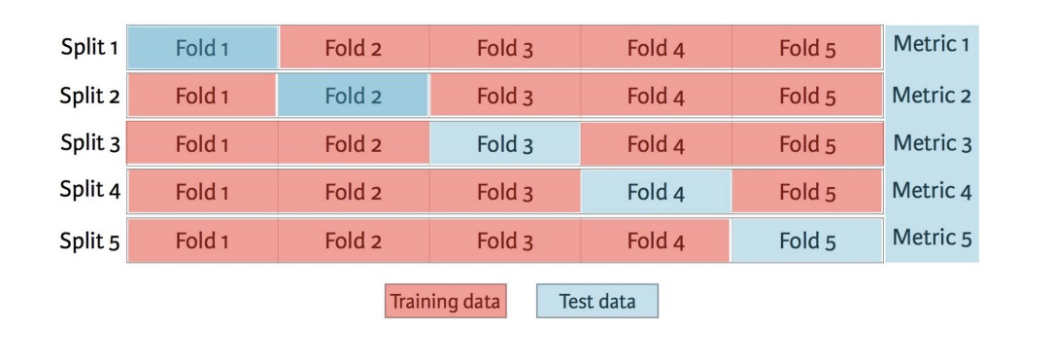






When performing k-fold cross validation, you have to use slightly different functions. We will be using a pipeline here, so we can not just do classificaiton, but also scale each of our folds before feeding it to the classifier. Note: you cannot just scale the whole dataset, because if you scale the test set and training set together, you already feed the model info about the test set before it is build (this is cheating ; ). 

A full list of all metrics (e.g. roc_auc) that can be displayed can be found [here](https://scikit-learn.org/stable/modules/model_evaluation.html). 


First we load the data. For demonstration purposes, I just load the data from the tutorial above here. 


Now we can define our model (in this case `LogisticRegressionCV()`, but there are equivalent CV models for the above used models).  Then we define our pipeline, which does the normalization, followed by our model. 

The function `cross_val_score` will allow us to execute the pipeline using k-fold cross validation, and the funciton `cross_val_prediction` will provide us the predictions that we can use to get a confusion matrix. 

In [52]:
x = data.drop('Class',1)
y = data['Class']

In [234]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, make_scorer

def auc_scorer(y_true, y_pred):
    d = y_true.unique()
    class_name = list(d.flatten())
    auroc = [0,0,0]
    auroc_mean = [0,0,0]
    for p in class_name:
      fpr, tpr, thresholds = roc_curve(y_true, y_pred[:,1], pos_label = p)
      score = round(auc(fpr, tpr),2)
      auroc[p] = score
      # auroc_mean[p] += auroc[p]
    return auroc

clf = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=10))

pipeline = Pipeline([('transformer', MinMaxScaler()), ('estimator', clf)])

scores = cross_val_score(pipeline, x, y, cv=10)

print('The accuracy of each fold: ')
print(scores, '\n')

print ('Average accuracy across folds: ' + str(scores.mean()), '\n')

print('The AUC of each fold: ')
cv = KFold(n_splits= 10)
i = 1
mean = [0,0,0]
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    auroc = auc_scorer(y.iloc[test],prediction)
    for i in range(3):
        mean[i]+= auroc[i]/10
    print('Fold ', i, '-', auroc)
    i+=1

for i in range(3):
  print ('Average AUC per class ',i,': ', mean[i]) 


print('\n','Final confusion matrix: ')
y_pred = cross_val_predict(pipeline, x, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)

print(conf_mat, '\n')
print('I notice a decrease in accuracy.')


The accuracy of each fold: 
[0.72916667 0.70833333 0.64583333 0.625      0.625      0.66666667
 0.77083333 0.64583333 0.79166667 0.6875    ] 

Average accuracy across folds: 0.6895833333333333 

The AUC of each fold: 
Fold  2 - [0.11, 0.79, 0.37]
Fold  2 - [0.07, 0.91, 0.39]
Fold  2 - [0.14, 0.81, 0.45]
Fold  2 - [0.31, 0.74, 0.51]
Fold  2 - [0.19, 0.96, 0.41]
Fold  2 - [0.39, 0.78, 0.48]
Fold  2 - [0.2, 0.94, 0.41]
Fold  2 - [0.17, 0.96, 0.45]
Fold  2 - [0.21, 1.0, 0.52]
Fold  2 - [0.36, 0.86, 0.4]
Average AUC per class  0 :  0.21499999999999997
Average AUC per class  1 :  0.875
Average AUC per class  2 :  0.4389999999999999

 Final confusion matrix: 
[[ 94   2  46]
 [  1 106  20]
 [ 48  36 127]] 



Now for exercise 2. Run your best performing model for exercise 1 with 10-fold cross validation and get the AUC, acc, and confusion matrix. Do you notice a difference in results? 

Hint, you will need to calculate AUC for each 2 classes separately, e.g. https://stackoverflow.com/questions/56227246/how-to-calculate-roc-auc-score-having-3-classes

Confusion matrix can be 1 with 3 columns and rows: https://datascience.stackexchange.com/questions/40067/confusion-matrix-three-classes-python/40068
